## Week 3: Remaining SQL Skills & Python Foundations for Data Analysis

In [1]:
%load_ext sql
import pandas as pd
from IPython.display import YouTubeVideo

## Announcements

- RMIS Fund
- The deadline for the Call for Abstracts for the Morgridge Student Research Conference has been extended to April 21st! 100-300 word abstract
- Any students (including those not participating in the Morgridge conference) are invited to the Conferencing 101 online sessions. Information and registration can be found at https://crimsonconnect.du.edu/morgridge/rsvp_boot?id=2269483. This Thursday's session is a forum on public speaking and data visualization. 3-4pm via Zoom.

## Today

- Last week of `SQL` and `Python` fundamentals
- Review and expand SQL query techniques
- Understand relational database JOINs
- Master Python loops and data iteration concepts
- Transition from basic SQL to data analysis with Python

This course is challenging, but the type of challenge changes after this week.

Up to now, the challenge is in context-shifting, and understanding the differences between many different concepts. Starting next week, the challenge will be more about application and problem-solving. Fewer disparate concepts, but trickier to grasp.

## Review

### Wins and confusion

Let's go around the room.

Answer any of the following, _or pass_ if you have nothing to share:
- What was one 'win' from last week?
- What are you excited to learn more about?
- What is confusing?

### Mapping this course's concepts

**Databases**
 - Relational databases
 - NoSQL databases
 - The systems are known as DBMSs - Database Management Systems
 
**DBMSs**
 - The one we use is 'SQLite': which is super lightweight, stored as a single file on your filesystem, with dynamic typing

### Mapping this course's concepts

**SQL**: a language for accessing databases: how do you ask for stuff from the system?
- not quite a programming language: it's heavily structured to its task of 'asking for stuff'
- SQL can exists in many forms: on the command line, in an application. It is _not_ inherently relat ed to or dependent on Python, though Python is one possible way to use it.

**Python**: a programming language. Allows you to do many things, but we'll be focusing on database -> data science uses.

Why are we learning Python? After this week, we'll be relying on tools in Python to work with structured data.

## SQL Review

`CREATE TABLE table_name (column1, column2);`

`INSERT INTO table_name VALUES (field1, field2);`

`SELECT column1, column2 FROM table_name;`

In [2]:
%sql sqlite:///../data/circulation.sqlite

### `WHERE` clause - Filtering Data
The WHERE clause allows you to filter results based on conditions

In [3]:
%%sql sqlite:///../data/circulation.sqlite
SELECT * FROM patrons
    WHERE age == 61;

Done.


[(236, 'Jonathan Daniels', 61, 'qgutierrez@jimenez.com', '34547', 'Port Stephanie', 2),
 (449, 'Molly Acosta', 61, 'tinagrant@hotmail.com', '62921', 'East Pamelaburgh', 3),
 (484, 'Wesley Price', 61, 'munozkevin@gmail.com', '48788', 'Loganchester', 7),
 (492, 'Karla Alexander', 61, 'desiree22@brown-williams.com', '45479', 'Lake Marissa', 4),
 (727, 'Luis Ho', 61, 'jstanley@schaefer.com', '75009', 'Michelefurt', 0)]

### `AND`

In [11]:
%%sql
SELECT * FROM patrons
    WHERE age > 60 AND activity > 6;

 * sqlite:///../data/circulation.sqlite
Done.


[]

### Lab 2 Review

In [4]:
%%sql sqlite:///
DROP TABLE IF EXISTS worker_wages;
CREATE TABLE worker_wages (role, num_workers, wage);
INSERT INTO worker_wages VALUES
    ('Big piecer', 5902, 233.59),
    ('Engineman', 909, 388.47),
    ('Foreman', 2883, 466.54),
    ('Grinders', 1983, 399.9),
    ('Labourer', 208, 269.73),
    ('Mechanic', 669, 440.82),
    ('Others', 2966, 311.64),
    ('Sizer', 597, 469.62),
    ('Spinner', 6951, 408.97),
    ('Twister', 865, 357.2); 

Done.
Done.
10 rows affected.


[]

**Q**: Write the SQL to add these two rows to the `worker_wages` table:
        
| worker | num_workers |	wage |
|-------|--------------|---------|
|Drawer |	375|	328.98|
|Warehouseman|	1586|	308.73|

In [5]:
%%sql
INSERT INTO worker_wages VALUES ("Drawer", 375, 328.98 ),
                        ("warehouseman", 1586, 308);

 * sqlite:///../data/circulation.sqlite
2 rows affected.


[]

**Q**: What's wrong with this SQL?
    
```sql
    INSERT INTO worker_wages VALUES (Weaver, 8577, 273.97);
```

In [6]:
%%sql sqlite:///../data/week2.db
SELECT * from heights
    WHERE height >  185;

Done.


[(7, 8, 'M', 69, 186, 73.0, 180.0),
 (16, 17, 'M', 92, 187, 101.0, 185.0),
 (18, 19, 'M', 76, 197, 75.0, 200.0),
 (39, 40, 'M', 65, 187, 67.0, 188.0),
 (64, 65, 'M', 97, 189, 98.0, 185.0),
 (94, 95, 'M', 88, 189, 87.0, 185.0),
 (138, 139, 'M', 90, 188, 91.0, 185.0),
 (139, 140, 'M', 85, 191, 83.0, 188.0),
 (168, 169, 'M', 96, 191, 95.0, 188.0)]

What's wrong with this?

In [7]:
%%sql
SELECT * from heights
    WHERE sex == 'M';

   sqlite:///../data/circulation.sqlite
 * sqlite:///../data/week2.db
Done.


[(0, 1, 'M', 77, 182, 77.0, 180.0),
 (3, 4, 'M', 68, 177, 70.0, 175.0),
 (5, 6, 'M', 76, 170, 76.0, 165.0),
 (6, 7, 'M', 76, 167, 77.0, 165.0),
 (7, 8, 'M', 69, 186, 73.0, 180.0),
 (8, 9, 'M', 71, 178, 71.0, 175.0),
 (9, 10, 'M', 65, 171, 64.0, 170.0),
 (10, 11, 'M', 70, 175, 75.0, 174.0),
 (16, 17, 'M', 92, 187, 101.0, 185.0),
 (18, 19, 'M', 76, 197, 75.0, 200.0),
 (20, 21, 'M', 119, 180, 124.0, 178.0),
 (22, 23, 'M', 65, 175, 66.0, 173.0),
 (23, 24, 'M', 66, 173, 70.0, 170.0),
 (29, 30, 'M', 101, 183, 100.0, 180.0),
 (31, 32, 'M', 75, 178, 73.0, 175.0),
 (32, 33, 'M', 79, 173, 76.0, 173.0),
 (35, 36, 'M', 64, 176, 65.0, 175.0),
 (37, 38, 'M', 69, 174, 69.0, 171.0),
 (38, 39, 'M', 88, 178, 86.0, 175.0),
 (39, 40, 'M', 65, 187, 67.0, 188.0),
 (41, 42, 'M', 80, 178, 80.0, 178.0),
 (43, 44, 'M', 78, 183, 80.0, 180.0),
 (44, 45, 'M', 85, 179, 82.0, 175.0),
 (46, 47, 'M', 73, 180, None, None),
 (50, 51, 'M', 82, 182, 85.0, 183.0),
 (52, 53, 'M', 74, 169, 73.0, 170.0),
 (53, 54, 'M', 102, 185, 107.0, 185.0),
 (54, 55, 'M', 64, 177, None, None),
 (55, 56, 'M', 65, 176, 64.0, 172.0),
 (57, 58, 'M', 73, 183, 74.0, 180.0),
 (58, 59, 'M', 75, 172, 70.0, 169.0),
 (59, 60, 'M', 57, 173, 58.0, 170.0),
 (60, 61, 'M', 68, 165, 69.0, 165.0),
 (61, 62, 'M', 71, 177, 71.0, 170.0),
 (62, 63, 'M', 71, 180, 76.0, 175.0),
 (64, 65, 'M', 97, 189, 98.0, 185.0),
 (69, 70, 'M', 80, 178, 76.0, 175.0),
 (71, 72, 'M', 66, 173, 66.0, 175.0),
 (78, 79, 'M', 69, 182, 70.0, 180.0),
 (79, 80, 'M', 69, 183, 70.0, 183.0),
 (81, 82, 'M', 55, 168, 56.0, 170.0),
 (85, 86, 'M', 59, 182, 61.0, 183.0),
 (86, 87, 'M', 62, 178, 66.0, 175.0),
 (90, 91, 'M', 70, 173, 68.0, 170.0),
 (92, 93, 'M', 84, 184, 86.0, 183.0),
 (93, 94, 'M', 69, 180, 71.0, 180.0),
 (94, 95, 'M', 88, 189, 87.0, 185.0),
 (96, 97, 'M', 103, 185, 101.0, 182.0),
 (101, 102, 'M', 63, 178, 63.0, 175.0),
 (110, 111, 'M', 84, 183, 90.0, 183.0),
 (111, 112, 'M', 79, 179, 79.0, 171.0),
 (113, 114, 'M', 67, 179, 67.0, 179.0),
 (116, 117, 'M', 83, 184, 83.0, 181.0),
 (117, 118, 'M', 96, 184, 94.0, 183.0),
 (118, 119, 'M', 75, 169, 76.0, 165.0),
 (119, 120, 'M', 65, 178, 66.0, 178.0),
 (120, 121, 'M', 78, 178, 77.0, 175.0),
 (121, 122, 'M', 69, 167, 73.0, 165.0),
 (124, 125, 'M', 67, 179, None, None),
 (131, 132, 'M', 87, 185, 89.0, 185.0),
 (134, 135, 'M', 83, 177, 84.0, 175.0),
 (138, 139, 'M', 90, 188, 91.0, 185.0),
 (139, 140, 'M', 85, 191, 83.0, 188.0),
 (140, 141, 'M', 66, 175, 68.0, 175.0),
 (149, 150, 'M', 88, 184, 86.0, 183.0),
 (155, 156, 'M', 54, 169, 58.0, 165.0),
 (156, 157, 'M', 69, 172, 68.0, 174.0),
 (164, 165, 'M', 56, 163, 58.0, 161.0),
 (168, 169, 'M', 96, 191, 95.0, 188.0),
 (170, 171, 'M', 76, 169, 75.0, 165.0),
 (172, 173, 'M', 61, 170, 61.0, 170.0),
 (173, 174, 'M', 82, 176, None, None),
 (174, 175, 'M', 62, 168, 64.0, 168.0),
 (175, 176, 'M', 71, 178, 68.0, 178.0),
 (177, 178, 'M', 66, 170, 67.0, 165.0),
 (178, 179, 'M', 81, 178, 82.0, 175.0),
 (179, 180, 'M', 68, 174, 68.0, 173.0),
 (180, 181, 'M', 80, 176, 78.0, 175.0),
 (182, 183, 'M', 82, 181, None, None),
 (184, 185, 'M', 70, 173, 70.0, 173.0),
 (188, 189, 'M', 76, 183, 75.0, 180.0),
 (190, 191, 'M', 88, 185, 93.0, 188.0),
 (191, 192, 'M', 89, 173, 86.0, 173.0),
 (195, 196, 'M', 74, 175, 71.0, 175.0),
 (196, 197, 'M', 83, 180, 80.0, 180.0),
 (197, 198, 'M', 81, 175, None, None),
 (198, 199, 'M', 90, 181, 91.0, 178.0),
 (199, 200, 'M', 79, 177, 81.0, 178.0)]

*Q*: How would you select the women that overestimate their weight and underestimate their height?

In [8]:
%%sql
SELECT * FROM heights
    WHERE sex == 'F'
    AND repwt > weight
    AND repht < height
;

   sqlite:///../data/circulation.sqlite
 * sqlite:///../data/week2.db
Done.


[(2, 3, 'F', 53, 161, 54.0, 158.0),
 (12, 13, 'F', 51, 161, 52.0, 158.0),
 (14, 15, 'F', 52, 163, 57.0, 160.0),
 (15, 16, 'F', 65, 166, 66.0, 165.0),
 (24, 25, 'F', 54, 171, 59.0, 168.0),
 (27, 28, 'F', 58, 166, 60.0, 160.0),
 (28, 29, 'F', 39, 157, 41.0, 153.0),
 (45, 46, 'F', 54, 160, 55.0, 158.0),
 (48, 49, 'F', 54, 174, 56.0, 173.0),
 (51, 52, 'F', 56, 165, 57.0, 163.0),
 (73, 74, 'F', 56, 163, 57.0, 159.0),
 (76, 77, 'F', 50, 160, 55.0, 150.0),
 (77, 78, 'F', 63, 160, 64.0, 158.0),
 (88, 89, 'F', 57, 163, 59.0, 160.0),
 (95, 96, 'F', 56, 165, 57.0, 160.0),
 (104, 105, 'F', 62, 175, 63.0, 173.0),
 (112, 113, 'F', 55, 174, 57.0, 171.0),
 (114, 115, 'F', 76, 167, 77.0, 165.0),
 (141, 142, 'F', 52, 163, 53.0, 160.0),
 (142, 143, 'F', 53, 165, 55.0, 163.0),
 (150, 151, 'F', 57, 168, 58.0, 165.0)]

## Python Review

### Comments

In Python, a is a line starting with a `#`

In [9]:
# This line does nothing
print('hello')
# This line is also ignored by the code

hello


Some lab answers include a comment (e.g. `#Answer-Q1`) - this is ignored by Python, but Dr. O uses it to find your answer!

### Indentation and Punctuation

- Python doesn't use semi-colons to end a line. If you don't have partially finished code, it assumes each line-break ends the code.

- Indentation matters for some things, like *loops* - similar to how we would understand indentation in a point-form list, Python understands it as 'the indented part is related to the unindented lead-in.'

In [10]:
x = 3
if x > 2:
    print(x)

3


In [11]:
for x in [0,1,2,3]:
    if x > 2:
        print(x, "is higher than two")
    else:
        print(x, "is lower or equal to two")

0 is lower or equal to two
1 is lower or equal to two
2 is lower or equal to two
3 is higher than two


(We won't be working with 'if' statements' much in this class.)

### Loops for Data Processing

A `for` loop is essential for processing datasets row by row:

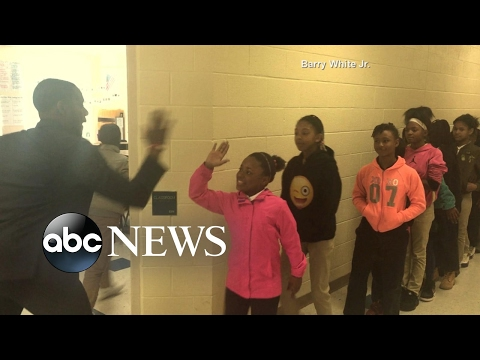

In [12]:
YouTubeVideo('I0jgcyfC2r8')

```python
for something in a_bunch_of_somethings:
    do_something()
    do_something_else()
```

*"For every student in the class, perform handshake"*

```python
for student in classroom:
    handshake(student)
```

`for` loops *iterate* through a collection of objects, setting each object to a variable and running through the loop in turn.

'collection of objects' - vague and general, because there's a lot you can iterate through.

*"For every student in the class, perform **a student-specific** handshake"*

```python
for student in classroom:
    handshake(student)
```

Where `handshake(name)` is an imaginary function that can bring up a student's handshake instructions.

In [13]:
# Credit card balance
balance = 1000

for expense in [6, 5, 4, 3, -1000]:
    print("SPENDING:")
    print(expense)
    balance = balance + expense
    print("REMAINING:")
    print(balance)
    print('-----------')
    
print("Final balance:", balance)

SPENDING:
6
REMAINING:
1006
-----------
SPENDING:
5
REMAINING:
1011
-----------
SPENDING:
4
REMAINING:
1015
-----------
SPENDING:
3
REMAINING:
1018
-----------
SPENDING:
-1000
REMAINING:
18
-----------
Final balance: 18


In [14]:
balance = 1000

for expense in [6, 5, 4, 3, -1000]:
    if expense > 0:
        print("Spending $", expense)
    else:
        print("Payday!")

    balance = balance + expense
    print("Remaining balanced on credit card: $", balance)

Spending $ 6
Remaining balanced on credit card: $ 1006
Spending $ 5
Remaining balanced on credit card: $ 1011
Spending $ 4
Remaining balanced on credit card: $ 1015
Spending $ 3
Remaining balanced on credit card: $ 1018
Payday!
Remaining balanced on credit card: $ 18


Example over looping over results.

(Don't worry about the syntax here, just what the information in `results` looks like)

In [ ]:
# Question from last week: Set a variable x to 0, then write a loop to add the following numbers to it: 1,1,2,3,5,8,13,21. This one can be tricky - I've started it for you.
apple_basket = 0
apples_per_tree = [1,1,2,3,5,8,13,21]

In [15]:
%sql sqlite:///../data/week2.db
results = %sql SELECT * FROM heights;

   sqlite:///../data/circulation.sqlite
 * sqlite:///../data/week2.db
Done.


In [16]:
for record in results:
    print(record)

(0, 1, 'M', 77, 182, 77.0, 180.0)
(1, 2, 'F', 58, 161, 51.0, 159.0)
(2, 3, 'F', 53, 161, 54.0, 158.0)
(3, 4, 'M', 68, 177, 70.0, 175.0)
(4, 5, 'F', 59, 157, 59.0, 155.0)
(5, 6, 'M', 76, 170, 76.0, 165.0)
(6, 7, 'M', 76, 167, 77.0, 165.0)
(7, 8, 'M', 69, 186, 73.0, 180.0)
(8, 9, 'M', 71, 178, 71.0, 175.0)
(9, 10, 'M', 65, 171, 64.0, 170.0)
(10, 11, 'M', 70, 175, 75.0, 174.0)
(11, 12, 'F', 166, 57, 56.0, 163.0)
(12, 13, 'F', 51, 161, 52.0, 158.0)
(13, 14, 'F', 64, 168, 64.0, 165.0)
(14, 15, 'F', 52, 163, 57.0, 160.0)
(15, 16, 'F', 65, 166, 66.0, 165.0)
(16, 17, 'M', 92, 187, 101.0, 185.0)
(17, 18, 'F', 62, 168, 62.0, 165.0)
(18, 19, 'M', 76, 197, 75.0, 200.0)
(19, 20, 'F', 61, 175, 61.0, 171.0)
(20, 21, 'M', 119, 180, 124.0, 178.0)
(21, 22, 'F', 61, 170, 61.0, 170.0)
(22, 23, 'M', 65, 175, 66.0, 173.0)
(23, 24, 'M', 66, 173, 70.0, 170.0)
(24, 25, 'F', 54, 171, 59.0, 168.0)
(25, 26, 'F', 50, 166, 50.0, 165.0)
(26, 27, 'F', 63, 169, 61.0, 168.0)
(27, 28, 'F', 58, 166, 60.0, 160.0)
(28, 29,

Knowing we can iterate through the results from the SQL table, how might we look at the average difference between estimate and reality?

In [17]:
%sql SELECT * FROM heights LIMIT 1;

   sqlite:///../data/circulation.sqlite
 * sqlite:///../data/week2.db
Done.


[(0, 1, 'M', 77, 182, 77.0, 180.0)]

In [18]:
# Edit this
%sql sqlite:///../data/week2.db
results = %sql SELECT * FROM heights;
for record in results:
    print(record)

   sqlite:///../data/circulation.sqlite
 * sqlite:///../data/week2.db
Done.
(0, 1, 'M', 77, 182, 77.0, 180.0)
(1, 2, 'F', 58, 161, 51.0, 159.0)
(2, 3, 'F', 53, 161, 54.0, 158.0)
(3, 4, 'M', 68, 177, 70.0, 175.0)
(4, 5, 'F', 59, 157, 59.0, 155.0)
(5, 6, 'M', 76, 170, 76.0, 165.0)
(6, 7, 'M', 76, 167, 77.0, 165.0)
(7, 8, 'M', 69, 186, 73.0, 180.0)
(8, 9, 'M', 71, 178, 71.0, 175.0)
(9, 10, 'M', 65, 171, 64.0, 170.0)
(10, 11, 'M', 70, 175, 75.0, 174.0)
(11, 12, 'F', 166, 57, 56.0, 163.0)
(12, 13, 'F', 51, 161, 52.0, 158.0)
(13, 14, 'F', 64, 168, 64.0, 165.0)
(14, 15, 'F', 52, 163, 57.0, 160.0)
(15, 16, 'F', 65, 166, 66.0, 165.0)
(16, 17, 'M', 92, 187, 101.0, 185.0)
(17, 18, 'F', 62, 168, 62.0, 165.0)
(18, 19, 'M', 76, 197, 75.0, 200.0)
(19, 20, 'F', 61, 175, 61.0, 171.0)
(20, 21, 'M', 119, 180, 124.0, 178.0)
(21, 22, 'F', 61, 170, 61.0, 170.0)
(22, 23, 'M', 65, 175, 66.0, 173.0)
(23, 24, 'M', 66, 173, 70.0, 170.0)
(24, 25, 'F', 54, 171, 59.0, 168.0)
(25, 26, 'F', 50, 166, 50.0, 165.0)
(26,

In [19]:
total_height = 0

for id, id2, sex, weight, height, reported_weight, reported_height in results[:5]:
    diffh = height - reported_height
    diffw = weight - reported_weight
    print("Person", id)
    print("   The difference between their real and reported height is", diffh)
    print("   The difference between their real and reported weight is", diffw)

Person 0
   The difference between their real and reported height is 2.0
   The difference between their real and reported weight is 0.0
Person 1
   The difference between their real and reported height is 2.0
   The difference between their real and reported weight is 7.0
Person 2
   The difference between their real and reported height is 3.0
   The difference between their real and reported weight is -1.0
Person 3
   The difference between their real and reported height is 2.0
   The difference between their real and reported weight is -2.0
Person 4
   The difference between their real and reported height is 2.0
   The difference between their real and reported weight is 0.0


In [20]:
total_height = 0  
number_of_people = 0 

for id, id2, sex, weight, height, reported_weight, reported_height in results:
    total_height = total_height + height
    number_of_people = number_of_people + 1
    
total_height / number_of_people

170.02

# More SQL Concepts

`LIMIT`, `ORDER BY`, `LIKE`, `OR`, `JOIN`


*To follow along*

Download [circulation.sqlite](https://github.com/organisciak/Scripting-Course/blob/master/data/circulation.sqlite?raw=true) and place in the same folder as the lab, or run Dr. O's auto-downloading cell. Then connect to it in this way:

```
%load_ext sql
%sql sqlite:///circulation.sqlite
```

In [21]:
# On Dr. O's computer, the file is not in the same folder, 
# but one directory up, in a 'data' folder. That's why ../data/ is added here.
%sql sqlite:///../data/circulation.sqlite

## `LIMIT`

LIMIT can limit the number of results that SELECT returns. Add it to the end of a `SELECT` statement.

```sql
SELECT colName
    FROM tableName
    LIMIT count;
```

In [22]:
%%sql
SELECT * FROM patrons
LIMIT 5;

 * sqlite:///../data/circulation.sqlite
   sqlite:///../data/week2.db
Done.


[(1, 'Jeremy Mata', 30, 'timothymoore@gmail.com', '52022', 'Thomasmouth', 9),
 (2, 'Daniel Garcia', 55, 'mcdanielwilliam@sanchez-herrera.biz', '09529', 'Deborahbury', 3),
 (3, 'Warren Green', 17, 'janice81@flores.com', '55036', 'Michelefurt', 1),
 (4, 'Erika Smith', 4, 'tnichols@gregory.com', '11235', 'Port Stephanie', 3),
 (5, 'Matthew Johnson', 22, 'christina30@manning.info', '52521', 'Jamesfort', 4)]

### Quick look at our current database

In [23]:
%%sql
SELECT * FROM circulation
    LIMIT 2;

 * sqlite:///../data/circulation.sqlite
   sqlite:///../data/week2.db
Done.


[(1898, 862, '2017-05-11 16:53:33.000000', '2017-06-09 16:40:11.804214'),
 (450, 215, '2018-01-05 13:07:20.000000', '2018-01-23 10:00:01.071255')]

In [24]:
%%sql
SELECT * FROM patrons
    LIMIT 2;

 * sqlite:///../data/circulation.sqlite
   sqlite:///../data/week2.db
Done.


[(1, 'Jeremy Mata', 30, 'timothymoore@gmail.com', '52022', 'Thomasmouth', 9),
 (2, 'Daniel Garcia', 55, 'mcdanielwilliam@sanchez-herrera.biz', '09529', 'Deborahbury', 3)]

In [25]:
%%sql
SELECT * FROM books
    LIMIT 2;

 * sqlite:///../data/circulation.sqlite
   sqlite:///../data/week2.db
Done.


[(1, 'Sun Tzu: Art Of War', 'Sun Tzu', '0-433-19939-3'),
 (2, 'The Way and Its Power: A Study of the Tao T? Ching and Its Place in Chinese Thought', 'Arth Estate the', '0-213-70445-5')]

In [26]:
%%sql
SELECT * FROM circulation
    LIMIT 2;

 * sqlite:///../data/circulation.sqlite
   sqlite:///../data/week2.db
Done.


[(1898, 862, '2017-05-11 16:53:33.000000', '2017-06-09 16:40:11.804214'),
 (450, 215, '2018-01-05 13:07:20.000000', '2018-01-23 10:00:01.071255')]

## Paging

`LIMIT offset, count`

In [27]:
%%sql
SELECT * FROM patrons
    LIMIT 5, 5;

 * sqlite:///../data/circulation.sqlite
   sqlite:///../data/week2.db
Done.


[(6, 'Jackson Jackson', 6, 'vincent18@compton-figueroa.com', '83620', 'Irwinside', 5),
 (7, 'Sarah Brown', 19, 'tyler16@mendoza.biz', '98407', 'Kevinmouth', 4),
 (8, 'Michael Barnett', 46, 'keith30@andersen.com', '56064', 'Marystad', 7),
 (9, 'Hector Hill', 31, 'ztaylor@watts.com', '13482', 'Thomasmouth', 2),
 (10, 'Julie Barron', 31, 'clarknorman@hotmail.com', '45597', 'East Williamport', 4)]

## `ORDER BY`

 > `ORDER BY columnName DESC|ASC`

`ORDER BY` allows you to specify a column to sort by, and whether it is sorted in ascending order (`ASC`) or descending order (`DESC`).

In [28]:
%%sql sqlite:///../data/circulation.sqlite
SELECT * FROM patrons
    ORDER BY age DESC
    LIMIT 5; 

Done.


[(516, 'Latoya Clark', 82, 'lanceosborne@hotmail.com', '79851', 'Deborahbury', 9),
 (911, 'Jackie Arias', 80, 'sandra83@ramirez-wheeler.com', '53858', 'Michelefurt', 9),
 (89, 'Jennifer Bradley', 79, 'jacquelinenoble@williams-ayala.com', '63196', 'Port Stephanie', 4),
 (385, 'Shannon Smith', 79, 'christinamullen@yahoo.com', '24061', 'Walkerview', 0),
 (238, 'Christopher James', 78, 'cookchristopher@yahoo.com', '71849', 'Cooperton', 4)]

In [29]:
%%sql
SELECT * FROM patrons
    ORDER BY name ASC
    LIMIT 5; 

 * sqlite:///../data/circulation.sqlite
   sqlite:///../data/week2.db
Done.


[(149, 'Aaron Lindsey', 23, 'nancyzuniga@reed.com', '34642', 'Colechester', 8),
 (25, 'Aaron Sampson', 29, 'mark96@matthews.com', '05855', 'East Brookefort', 2),
 (548, 'Aaron Savage', 30, 'phillipsjason@haynes.com', '96235', 'Jamesfort', 7),
 (654, 'Aaron Shah', 24, 'khill@yahoo.com', '10017', 'Normanville', 1),
 (416, 'Abigail Vazquez', 40, 'becky04@alexander-ellis.com', '98164', 'Lake Marissa', 0)]

Review: when using a `WHERE` clause, how do we ask for multiple conditions?

_e.g. Select patrons that are 23 and have a library activity level of 7:_

In [30]:
%%sql
SELECT * FROM patrons
    WHERE age == 23 AND activity == 7

 * sqlite:///../data/circulation.sqlite
   sqlite:///../data/week2.db
Done.


[(23, 'Brittany Coleman', 23, 'watsonscott@gmail.com', '34912', 'North Stephenfort', 7),
 (517, 'Christina Bush', 23, 'moranjennifer@hotmail.com', '94699', 'South Danielport', 7)]

In [31]:
%%sql
SELECT * FROM patrons
    WHERE age == 23 AND age == 22;

 * sqlite:///../data/circulation.sqlite
   sqlite:///../data/week2.db
Done.


[]

What about people that are just one of those conditions: either 23 years old or have an activity level of 7?

## `OR`

In [ ]:
%%sql
SELECT * FROM patrons
    WHERE ...;

In [33]:
%%sql
SELECT * FROM patrons
    WHERE age == 23 OR activity == 7;

 * sqlite:///../data/circulation.sqlite
   sqlite:///../data/week2.db
Done.


[(8, 'Michael Barnett', 46, 'keith30@andersen.com', '56064', 'Marystad', 7),
 (18, 'Vanessa Owen', 12, 'hbailey@foley.com', '39489', 'East Brookefort', 7),
 (23, 'Brittany Coleman', 23, 'watsonscott@gmail.com', '34912', 'North Stephenfort', 7),
 (24, 'Justin Butler', 21, 'justinmejia@hotmail.com', '51105', 'Romerofort', 7),
 (32, 'Tiffany Brooks', 31, 'jeffreyburgess@gmail.com', '10722', 'South Matthew', 7),
 (39, 'William Henderson', 37, 'michaellee@hotmail.com', '25139', 'New Terri', 7),
 (66, 'Mr. Andrew Hahn', 23, 'showard@lee.com', '50404', 'Colechester', 0),
 (69, 'Matthew Nielsen', 39, 'gregory94@yahoo.com', '36438', 'East Brookefort', 7),
 (72, 'Carolyn Jackson', 32, 'nicole44@walls-anderson.com', '49528', 'North Melissabury', 7),
 (76, 'Elizabeth Contreras', 4, 'nmolina@gmail.com', '51577', 'Loganchester', 7),
 (92, 'Andrew Allison', 43, 'ocontreras@yahoo.com', '38735', 'North Stephenfort', 7),
 (96, 'Ryan Brown', 19, 'alvarezelizabeth@hotmail.com', '40498', 'New Hannah', 7),
 (100, 'Linda Taylor', 46, 'garzacindy@reyes.org', '97791', 'Port Stephanie', 7),
 (108, 'Gary Clark', 29, 'anthonysilva@yahoo.com', '92464', 'North Stephenfort', 7),
 (114, 'Olivia Perry', 28, 'angelachambers@zamora-bradshaw.com', '52321', 'Cooperton', 7),
 (124, 'Ashlee Marquez', 39, 'zherrera@hotmail.com', '48657', 'Port Stephanie', 7),
 (140, 'Richard Thomas', 40, 'nfoster@mills-aguilar.com', '53950', 'Walkerview', 7),
 (149, 'Aaron Lindsey', 23, 'nancyzuniga@reed.com', '34642', 'Colechester', 8),
 (150, 'Cody Reed', 19, 'roger05@yahoo.com', '07859', 'Colechester', 7),
 (156, 'Connie Lawrence', 40, 'xparker@gmail.com', '93753', 'Brianchester', 7),
 (163, 'Nathan Moore', 34, 'juan94@yahoo.com', '83166', 'Port Stephanie', 7),
 (171, 'Tamara Jenkins', 23, 'donaldsonamy@smith-baker.info', '72530', 'Doughertyside', 5),
 (179, 'Mr. Kevin Lewis', 32, 'zamoratiffany@yahoo.com', '53680', 'Lake Marissa', 7),
 (182, 'Chad Bell', 43, 'colleen78@smith.com', '09479', 'Colechester', 7),
 (189, 'Joel Tran', 23, 'patricklucas@hotmail.com', '61576', 'Lake Michaelfort', 1),
 (198, 'Richard Brown', 23, 'ismith@hotmail.com', '89519', 'North Melissabury', 5),
 (203, 'Michelle Guerrero', 42, 'john82@medina.org', '82779', 'Colechester', 7),
 (249, 'Kathleen Smith', 5, 'stacey08@martinez.biz', '58065', 'East Pamelaburgh', 7),
 (261, 'Tammie Rodriguez', 0, 'karenhughes@gmail.com', '54179', 'Deborahbury', 7),
 (271, 'Frank Franklin', 23, 'morrowmatthew@yahoo.com', '46865', 'Lake Michaelfort', 1),
 (273, 'Steven Ramirez MD', 31, 'obailey@washington.net', '33272', 'Gabriellechester', 7),
 (274, 'Julie Richards', 4, 'vgomez@kirk.biz', '28993', 'Deborahbury', 7),
 (275, 'Scott Bell', 44, 'jason84@yahoo.com', '20699', 'Lake Marissa', 7),
 (288, 'James Kennedy', 23, 'stephenshannah@patel.com', '54653', 'New Terri', 2),
 (300, 'Daniel Duncan', 50, 'bakeramber@coleman-bowers.com', '81882', 'Rothton', 7),
 (301, 'Carolyn Jones', 23, 'foleybrian@hotmail.com', '16822', 'South Amandabury', 8),
 (305, 'John Wells', 23, 'caitlin32@hotmail.com', '13761', 'Rothton', 2),
 (311, 'Ronald Patterson', 35, 'hdelgado@harris-wright.info', '72175', 'Irwinside', 7),
 (318, 'Laura Davis', 55, 'burkejoshua@bennett.com', '55741', 'North Stephenfort', 7),
 (319, 'Patricia Suarez', 27, 'olsoncathy@hotmail.com', '62905', 'South Matthew', 7),
 (320, 'Melissa Lee', 8, 'george87@yahoo.com', '88123', 'North Cristinaview', 7),
 (328, 'Peter Mueller', 36, 'cortezjames@anderson.biz', '44867', 'Lake Marissa', 7),
 (332, 'Arthur Haynes', 18, 'steven52@yahoo.com', '80823', 'Colechester', 7),
 (338, 'Kyle Torres', 23, 'gutierrezsharon@gmail.com', '55577', 'Irwinside', 3),
 (346, 'Jamie Patel', 57, 'ggonzalez@shelton-jones.info', '75196', 'Colechester', 7),
 (359, 'Cindy Hale', 43, 'april50@cannon-mcclure.info', '72176', 'North Melinda', 7),
 (360, 'Angela Mullins', 23, 'ykaiser@hotmail.com', '79674', 'North Cristinaview', 0),
 (370, 'Brian Kidd', 16, 'davilakyle@yahoo.com', '59693', 'South Danielport', 7),
 (37

## Pattern Matching with `LIKE`

Recall: Logical Operators

`>`, `>=`, `<`, `<=`, `==`, `!=`

SQL has a way to search for partial matches of strings.

First, an example:

In [34]:
%%sql
SELECT * FROM patrons
    WHERE name LIKE 'Ann%';

 * sqlite:///../data/circulation.sqlite
   sqlite:///../data/week2.db
Done.


[(211, 'Anna Coleman', 24, 'zrodgers@walker.com', '71120', 'South Danielport', 4),
 (256, 'Anna Boyd', 29, 'stephenchambers@yahoo.com', '37281', 'Kevinmouth', 2),
 (381, 'Anna Griffin', 4, 'nicolebaker@yahoo.com', '57213', 'Lake Michaelfort', 4),
 (496, 'Ann Sharp', 35, 'valdezjames@gmail.com', '93801', 'Kevinmouth', 2),
 (797, 'Anne Estes', 43, 'mendezcaitlin@lawrence.com', '90446', 'Romerofort', 8),
 (860, 'Anna Trevino', 44, 'gregory47@gmail.com', '10359', 'South Danielport', 4)]

*What did this statement do? What's notable about it?*

`LIKE` tells SQL to look out for special characters.

Special characters:
    
- `%`: Match any number of wildcard characters (zero or more)
- `_`: Match exactly one wildcard character

- `col_r`: will match 'color' but not 'colour'
- `col%r`: will match 'color' and 'colour'

#### Be careful: a `%` can match a lot

- `col%r`: will also match 'cold weather'

### Longer strings won't match unless there's a wildcard telling them to match

`WHERE name LIKE 'Smith'` *won't* match 'John Smith', because it's looking for an 'S' at the start.

*How do you fix it?*

`WHERE name LIKE '%Smith'`

Or even more precise, include the space:
    
`WHERE name LIKE '% Smith'`

### Practice

- Search for @gmail emails
- Match for 'Sarah'
- Match for 'Sarah', while allowing for prefixes like `Dr.`
- match for patrons 18 years or older, from cities that start with "North"

In [35]:
%%sql
SELECT * FROM patrons
LIMIT 10

 * sqlite:///../data/circulation.sqlite
   sqlite:///../data/week2.db
Done.


[(1, 'Jeremy Mata', 30, 'timothymoore@gmail.com', '52022', 'Thomasmouth', 9),
 (2, 'Daniel Garcia', 55, 'mcdanielwilliam@sanchez-herrera.biz', '09529', 'Deborahbury', 3),
 (3, 'Warren Green', 17, 'janice81@flores.com', '55036', 'Michelefurt', 1),
 (4, 'Erika Smith', 4, 'tnichols@gregory.com', '11235', 'Port Stephanie', 3),
 (5, 'Matthew Johnson', 22, 'christina30@manning.info', '52521', 'Jamesfort', 4),
 (6, 'Jackson Jackson', 6, 'vincent18@compton-figueroa.com', '83620', 'Irwinside', 5),
 (7, 'Sarah Brown', 19, 'tyler16@mendoza.biz', '98407', 'Kevinmouth', 4),
 (8, 'Michael Barnett', 46, 'keith30@andersen.com', '56064', 'Marystad', 7),
 (9, 'Hector Hill', 31, 'ztaylor@watts.com', '13482', 'Thomasmouth', 2),
 (10, 'Julie Barron', 31, 'clarknorman@hotmail.com', '45597', 'East Williamport', 4)]

## Lab Break

Let's turn to our lab and practice these skills for 20 minutes - Questions 1 to 9.

# Adding relations to the relational database with `JOIN`

![](../images/er-books1.png)

![](../images/er-books2.png)

In [36]:
%%sql
SELECT * FROM circulation LIMIT 2;

 * sqlite:///../data/circulation.sqlite
   sqlite:///../data/week2.db
Done.


[(1898, 862, '2017-05-11 16:53:33.000000', '2017-06-09 16:40:11.804214'),
 (450, 215, '2018-01-05 13:07:20.000000', '2018-01-23 10:00:01.071255')]

In [37]:
%%sql sqlite:///../data/circulation.sqlite
SELECT * FROM patrons WHERE id == '862' OR id == '215';

Done.


[(215, 'Joseph Santiago', 21, 'jennifer23@gmail.com', '46510', 'South Amandabury', 9),
 (862, 'Michelle Wood', 21, 'fcain@quinn.info', '10880', 'South Matthew', 3)]

In [38]:
%%sql
SELECT * FROM books WHERE id == '1898' OR id == '450';

 * sqlite:///../data/circulation.sqlite
   sqlite:///../data/week2.db
Done.


[(450, 'The Catcher in the Rye: Annotations and Study Aids', 'J.D. Salinger', '1-7372489-2-1'),
 (1898, 'The Curious Incident of the Dog in the Night-time', 'Mark Haddon', '0-916104-42-7')]

`JOIN` allows you to match up tables on a common column.

e.g. Combine `circulation` and `books` tables where circulation's 'book_id' matches up with 'id' from books.

Example:
    
Select our circulation columns again.

In [39]:
%%sql
SELECT * FROM circulation
    LIMIT 2;

 * sqlite:///../data/circulation.sqlite
   sqlite:///../data/week2.db
Done.


[(1898, 862, '2017-05-11 16:53:33.000000', '2017-06-09 16:40:11.804214'),
 (450, 215, '2018-01-05 13:07:20.000000', '2018-01-23 10:00:01.071255')]

Add the books columns:

In [40]:
%%sql
SELECT * FROM circulation
    JOIN books ON (circulation.book_id == books.id)
    LIMIT 2;

 * sqlite:///../data/circulation.sqlite
   sqlite:///../data/week2.db
Done.


[(1898, 862, '2017-05-11 16:53:33.000000', '2017-06-09 16:40:11.804214', 1898, 'The Curious Incident of the Dog in the Night-time', 'Mark Haddon', '0-916104-42-7'),
 (450, 215, '2018-01-05 13:07:20.000000', '2018-01-23 10:00:01.071255', 450, 'The Catcher in the Rye: Annotations and Study Aids', 'J.D. Salinger', '1-7372489-2-1')]

It matches!

**Problem**: Too many columns, and the id is redundant.

**Solution**: Select columns by referencing the table name, as in `tableName.columnName`.

e.g. 
- `SELECT circulation.checkout_time, books.title`
- `SELECT circulation.*, books.title`

In [41]:
%%sql
SELECT books.title, books.author, circulation.* FROM circulation
    JOIN books ON (circulation.book_id == books.id)
    LIMIT 2;

 * sqlite:///../data/circulation.sqlite
   sqlite:///../data/week2.db
Done.


[('The Curious Incident of the Dog in the Night-time', 'Mark Haddon', 1898, 862, '2017-05-11 16:53:33.000000', '2017-06-09 16:40:11.804214'),
 ('The Catcher in the Rye: Annotations and Study Aids', 'J.D. Salinger', 450, 215, '2018-01-05 13:07:20.000000', '2018-01-23 10:00:01.071255')]

*How do we add the patron info?*

In [42]:
%%sql
SELECT books.title, books.author, patrons.name, patrons.email, circulation.* FROM circulation
    JOIN books ON (circulation.book_id == books.id)
    JOIN patrons ON (circulation.patron_id == patrons.id) 
    LIMIT 2;

 * sqlite:///../data/circulation.sqlite
   sqlite:///../data/week2.db
Done.


[('The Curious Incident of the Dog in the Night-time', 'Mark Haddon', 'Michelle Wood', 'fcain@quinn.info', 1898, 862, '2017-05-11 16:53:33.000000', '2017-06-09 16:40:11.804214'),
 ('The Catcher in the Rye: Annotations and Study Aids', 'J.D. Salinger', 'Joseph Santiago', 'jennifer23@gmail.com', 450, 215, '2018-01-05 13:07:20.000000', '2018-01-23 10:00:01.071255')]

## Different types of `JOIN`s

Joins have a number of permutations:
 - INNER (the default)
 - LEFT, RIGHT, or FULL OUTER

For our examples we're joining `books` to `circulation`.

That is: we `SELECT ... FROM circulation` and `JOIN books`.

*One is considered the left table and the other is the right. Can you guess which one is which?*

Left: `circulation`, Right: `books`

Remember, we could have also selected from books, joining circulation - then the left and right would be flipped.

### INNER JOIN

An INNER JOIN only returns the records that match in both tables.

That is, if we `JOIN table2 ON (table1.id == table2.table1_id)`, We only return the rows where there's an id that exists in both tables.

Example:

- If circulation mentions a book_id and that book is in the books table - INNER JOIN will return that row
- If circulation mentions a book_id but that book isn't in the books table (banned by Big Brother?) - INNER JOIN won't return it 
- If there's a book that hasn't been checked out (no record in circulation) - INNER JOIN won't return it

Example use case:

- Get info for all the books that have been checked out.

### LEFT OUTER JOIN (often called just a `LEFT JOIN`)

A left outer join returns all the records in the left table whether they have a match in the right table or not. If there is no match, a NULL is returned.

Example:

- If circulation mentions a book_id and that book is in the books table - ...?
- If circulation mentions a book_id but that book isn't in the books table - ...?
- If there's a book that hasn't been checked out (no record in circulation) - ...?

Example:

- If circulation mentions a book_id and that book is in the books table - LEFT OUTER JOIN **will** return it
- If circulation mentions a book_id but that book isn't in the books table  - LEFT OUTER JOIN **will** return it 
- If there's a book that hasn't been checked out (no record in circulation) - LEFT OUTER JOIN **won't** return it

Example use case:

- Return all books that have been checked out - with info if we have it but still showing the checkout if the info is missing

### RIGHT OUTER JOIN

Return all records in the *right* table whether they have a match in the left table or not.

e.g. If there's a book that's never been checked out, it will still be shown.

### FULL OUTER JOIN

Return all records that are in either of the tables.

*SQLite doesn't support RIGHT OUTER and FULL OUTER*

### Practice with INNER JOIN (the default JOIN)

- How do we retrieve all the books checked out by 8-year olds?
    - (I made up this data... these aren't books kids are reading!)
- Who has most recently returned a book?
- Who has most recently checked out _The Catcher in the Rye_?

In [ ]:
%%sql
SELECT books.title, books.author, circulation.* FROM circulation
    JOIN books ON (circulation.book_id == books.id)
    ... 
    LIMIT 20 
    ;

Here's a semi-realistic use: retrieve the emails of anybody that hasn't returned their book yet:

In [101]:
%%sql
SELECT patrons.email, circulation.* FROM circulation 
    JOIN patrons ON (circulation.patron_id == patrons.id)
    WHERE circulation.return_time IS NULL
    LIMIT 10;

 * sqlite:///../data/circulation.sqlite
   sqlite:///../data/week2.db
Done.


[('Nicholas Harmon', 'savannah36@gmail.com', 122, 882, '2018-03-15 10:17:11.000000', None),
 ('John Wells', 'caitlin32@hotmail.com', 571, 305, '2018-04-04 08:24:34.000000', None),
 ('Scott Bell', 'jason84@yahoo.com', 45, 275, '2018-04-03 15:47:15.000000', None),
 ('Stephanie Harmon', 'elizabethhayes@gmail.com', 573, 537, '2018-03-15 07:36:33.000000', None),
 ('Rebecca Zimmerman', 'ofields@porter.biz', 272, 839, '2018-04-04 04:52:20.000000', None),
 ('Kathryn Nguyen', 'wongandrea@clark.net', 863, 828, '2018-03-14 17:49:29.000000', None),
 ('Renee George', 'jennifer02@hunter.com', 1508, 670, '2018-03-19 16:20:20.000000', None),
 ('Logan Matthews', 'igibson@gmail.com', 183, 321, '2018-03-30 03:49:07.000000', None),
 ('Heather Lopez', 'xwilliams@rollins.com', 135, 588, '2018-04-04 05:53:18.000000', None),
 ('Reginald Odonnell', 'davisdaniel@davis-moore.com', 1603, 210, '2018-04-06 17:21:21.000000', None)]

This uses a value that we haven't seen before - `IS NULL`.

*If you're looking for more details on SQL beyond this class's scope, [MySQL by Example for Beginners](https://www3.ntu.edu.sg/home/ehchua/programming/sql/MySQL_Beginner.html) from last week is a good reference.*

## Lab Break

Let's work on these skills for 20 minutes in the lab - Q10 - Q12. (If you didn't get through 1-9, you can return to them later)

# Python

### Bridging SQL and Python
- SQL is great for: retrieving, filtering, joining data from databases
- Python is great for: processing, analyzing, visualizing that data
- Together they form a powerful data analysis workflow

## Python: *methods* and *functions*

A function is a 'recipe' of multiple instructions that you may want to repeat.

You can recognize a function in Python by its parentheses. For example:
    
```print()```

This boils down a long set of instructions to just one.

When you run `print()`, it needs to figure out what system you're using and how to tell that system to shows something on the screen.

Consider:
- A Windows command line and a Mac OS command line print things different.
- Some terminals support special characters - others don't.
- In Jupyter, we're in a webpage: the results are printed in HTML.

#### Inputs to functions

Nobody just runs `print()` - you do something like:

In [51]:
print("Some text")

Some text


Inputs to functions are *arguments* - and there can be many!

Recall that we can look up code documentation in Jupyter with a `?`:

In [118]:
?print

Will show:

```
Docstring:
print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)

Prints the values to a stream, or to sys.stdout by default.
Optional keyword arguments:
file:  a file-like object (stream); defaults to the current sys.stdout.
sep:   string inserted between values, default a space.
end:   string appended after the last value, default a newline.
flush: whether to forcibly flush the stream.
```

There are more arguments that you can supply! 

```
print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
```

Multiple values:

In [43]:
print("Hello", "World")

Hello World


### Named Arguments
```
print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)

Prints the values to a stream, or to sys.stdout by default.
Optional keyword arguments:
file:  a file-like object (stream); defaults to the current sys.stdout.
sep:   string inserted between values, default a space.
end:   string appended after the last value, default a newline.
flush: whether to forcibly flush the stream.
```



`sep=' '` is a *named* argument: you can change it by referring to it by name, but if you don't change it, there is already a default set.

In [ ]:
pd.read_csv("data.csv", sep="....")

### Methods

Many objects in Python have build-in functions, called `methods`.

These look the same, but are run from the object, with a period denoting that 'this method belongs to this object'.

In [119]:
teststring = "Hello world"
teststring.upper()

'HELLO WORLD'

The `replace` method of strings:

In [124]:
teststring.replace('Hello', 'Goodbye')

'Goodbye world'

Try auto-complete to see all the methods for something:

In [ ]:
teststring.

### Method Chaining

Think about what type of object is returned by a method like `teststring.replace()`.

In [19]:
type(teststring)

str

In [133]:
output = teststring.replace('Hello', 'Goodbye')
words = output.split(' ')
words[0]

'world'

In [25]:
replaced = teststring.replace('Hello', 'Goodbye')
type(replaced)

str

Since the output is a string, it has the same methods that the original string has.

In [106]:
replaced = teststring.replace('Hello', 'Goodbye')
uppercased = replaced.upper()
uppercased

'GOODBYE WORLD'

Since we won't keep using `replaced` in this example and we know what type of output `replace()` has, we can *chain* the methods:

In [219]:
teststring.replace('Hello', 'Goodbye').upper()

'GOODBYE WORLD'

# When in doubt, set objects to multiple variables on multiple lines

Easy to read, easier to make sense of, easier to debug

## Python: Imports

In week 1, we discussed 'libraries': importable collections of code.

To import a library:

`import libraryname`

Then you can use the `libraryname` code.

Our soon-to-be-favorite library:

In [46]:
import pandas

When we use something a _lot_, we can give it a different name by saying 'import THIS as THAT'. 

e.g. Pandas convention is to call it `pd` in your code:

In [47]:
import pandas as pd

Dataset: Prestige of Canadian Occupations - [CSV](https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/carData/Prestige.csv), [DOC](http://vincentarelbundock.github.io/Rdatasets/doc/car/Prestige.html)

In [48]:
pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/carData/Prestige.csv")

rownames  education  income  women  prestige  census  type
0     gov.administrators      13.11   12351  11.16      68.8    1113  prof
1       general.managers      12.26   25879   4.02      69.1    1130  prof
2            accountants      12.77    9271  15.70      63.4    1171  prof
3    purchasing.officers      11.42    8865   9.11      56.8    1175  prof
4               chemists      14.62    8403  11.68      73.5    2111  prof
..                   ...        ...     ...    ...       ...     ...   ...
97           bus.drivers       7.58    5562   9.47      35.9    9171    bc
98          taxi.drivers       7.93    4224   3.59      25.1    9173    bc
99          longshoremen       8.37    4753   0.00      26.1    9313    bc
100          typesetters      10.00    6462  13.58      42.2    9511    bc
101          bookbinders       8.55    3617  70.87      35.2    9517    bc

[102 rows x 7 columns]